✅unsupervised anomaly detection methods :

Isolation forest, one class SVM, Auto encoders

✅Anomly detection models dont know what fraud is they learn whats normal and anything is different is considered fraud.

✅ Unsupervised Learning Definition
In unsupervised learning, the model:

Does not use labeled data during training

Learns patterns or structure from the input data only

Is typically used for tasks like clustering, dimensionality reduction, and anomaly detection



💡 What Is Anomaly Detection?
Anomaly detection is a technique used to find unusual or unexpected data points — things that don’t fit the normal pattern.

💡Feature engineering is about transforming the data to improve model performance (onhot encoding, handling missing data,...)

💡EDA is about understanding the data. Explore, visualize, and summarize the main characteristics of the dataset.

1. from data.describe we undertsand mean and std for each features

2. undertand dtype for each feature if its numeric or categorical 

3. distribution if its weel or skeweed using histplot and distplot

4. outliers using boxplot

5. correlaton matrix to undertsad relation of features to see how to reduce features

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("creditcard.csv")

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
y=df['Class']
print(y)
print((y==0).sum())
print((y==1).sum())


0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64
284315
492


Data is imabalnced:

Non-fraud (label 0): 284,315 samples

Fraud (label 1): 492 samples

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.shape

(284807, 31)

A small standard deviation (std) means the data is tightly grouped around the mean, but that doesn’t always mean the distribution is “good” or “normal.” We can check distribution usinh histplot or distplot



In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


If you have two features:

Amount: ranges from 0 to 10,000

V1: ranges from -2 to 2

Then PCA or other algorithms will give more weight to Amount, just because its values are bigger, not because it’s more important! So mean =0 mean distbute points  so that all of them ceneterd at zero

In [16]:
data = df.drop('Class', axis=1)
y = df['Class']


C:\Users\asus\AppData\Local\Temp\ipykernel_10328\3758815730.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Amount'])
C:\Users\asus\AppData\Local\Temp\ipykernel_10328\3758815730.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Time'])


<Axes: xlabel='Time', ylabel='Density'>

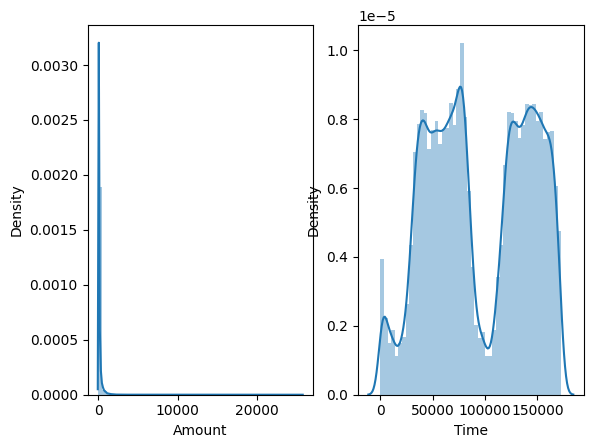

In [17]:

plt.subplot(1,2,1)
sns.distplot(data['Amount'])
plt.subplot(1,2,2)
sns.distplot(data['Time'])



Time and amount are not distributed well

Time’s large values will dominate. Models like PCA or Isolation Forest will focus mostly on Time instead of a balanced view.

By standardizing:

Both features will be transformed to have mean = 0 and std = 1.

It puts all features on the same scale, so one feature with big numbers doesn’t dominate.

<Axes: xlabel='Time', ylabel='Count'>

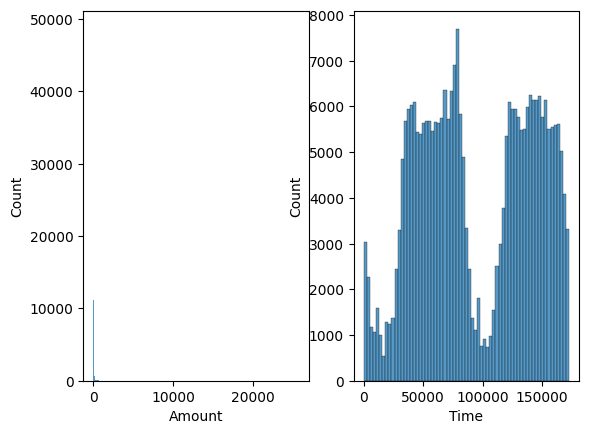

In [18]:

plt.subplot(1,2,1)
sns.histplot(data['Amount'])
plt.subplot(1,2,2)
sns.histplot(data['Time'])

Using sns.distplot, I can observe the range of values on the x-axis. If the values are close to each other and form a bell-shaped curve, it indicates that the standard deviation is low and the data is well distributed. However, if the distribution is skewed to the right or left, this suggests the presence of outliers, the values are more spread out, and the standard deviation is higher.

✅Machine learnng doesnot understand the unit of values of data so data scaling should be applies

✅This data scaling shoud be done before PCA and clustering

✅If you want to use PCA (for dimensionality reduction):

Always standardize first (with StandardScaler).

Then apply PCA on the standardized data.


✅If you want to use K-Means clustering directly on features:

Check feature distributions first.

For Gaussian-like features, use StandardScaler.

For skewed features (like Amount), use MinMaxScaler or log-transform + MinMaxScaler.

Combine all scaled features.

Optionally, apply PCA if dimensionality is very high.

Then apply K-Means on this processed data.

✅If you want to use Autoencoders:

You do NOT need PCA.

Use only normalization (MinMaxScaler) on your original features (no standardization).

Train the Autoencoder on normalized data.

In [19]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mms=MinMaxScaler()
ss=StandardScaler()


1. Time (in seconds)

2. Amount (in dollars)

3. V1 to V28 (PCA-transformed, unitless)

4. Then we MUST apply data scaling before using most machine learning models.

5. When to Use Standardization (Mean=0, Std=1):
    - When features have different units or scales and you want to center data and make variances comparable.

    - When using PCA, SVM, Isolation Forest, or other algorithms that assume data is centered.

6. When to Use Normalization (Scaling to [0,1]):

     - When features have different units but you want all values bounded in the same range.

     - When using algorithms sensitive to distance and where relative scale matters, such as(Clustering (KMEAN....),AUtoencoder)



In [20]:
#standarization before PCA because all fetaures have # unit
c=list(data.columns)
c


['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, stratify=y, random_state=42)


In [22]:
X_train.shape

(213605, 30)

In [23]:
y_train.shape

(213605,)

In [24]:
X_test.shape

(71202, 30)

In [26]:
for i in c:
    X_train[i]=ss.fit_transform(X_train[[i]])

In [27]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
17884,-1.387399,-0.428031,-0.317915,1.141343,-0.569365,-0.146846,-0.056996,0.045656,0.225429,0.477758,...,0.310850,0.065546,0.017543,0.564112,0.103305,-1.673411,1.363706,0.180857,0.570442,0.086952
232246,1.099295,-1.914679,-0.516200,-0.295416,-1.710287,-0.294848,-0.079603,0.099686,0.472501,0.875407,...,-2.026861,0.036249,0.859518,-0.065598,0.498571,0.310025,0.774514,-2.127660,0.496555,0.202551
208554,0.890221,-1.029972,0.963805,-0.354333,-1.094619,1.422971,-0.293457,-0.888141,-3.456044,0.654724,...,-1.740890,4.756131,-2.953140,-3.585144,-1.818182,-0.446753,-0.492952,1.342212,0.569171,0.170897
11464,-1.579101,0.702527,-0.264570,0.425326,-0.171021,-0.726695,-0.570890,-0.483143,-0.231207,0.705559,...,0.066956,-0.219234,-0.172212,-0.058003,0.592082,1.047749,-0.590929,-0.029024,0.028189,-0.272298
109718,-0.492333,-0.186166,0.657261,0.813514,0.613886,0.101933,-0.627937,0.602408,-0.083924,-0.449798,...,0.186092,0.153060,0.635703,-0.223405,0.638482,-0.381140,-0.655883,1.017719,0.693637,-0.315847


In [28]:
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,...,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05
mean,-3.858662e-17,-7.384681e-18,1.721429e-18,-1.287330e-17,-1.450325e-17,8.004230e-18,-2.145549e-17,-6.054108e-18,-9.646656e-19,-1.862803e-17,...,4.091513e-18,8.648726e-18,1.276519e-17,-2.677779e-18,-2.760939e-18,4.989650e-19,2.119769e-17,8.981369e-19,-1.729745e-18,-4.217917e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.998112e+00,-2.875392e+01,-4.403407e+01,-3.184806e+01,-4.011498e+00,-8.217623e+01,-1.960471e+01,-3.507226e+01,-6.132716e+01,-1.223592e+01,...,-7.078173e+01,-4.730365e+01,-1.506235e+01,-7.178124e+01,-4.685408e+00,-1.976019e+01,-5.401737e+00,-5.569717e+01,-4.726108e+01,-3.521314e-01
25%,-8.561119e-01,-4.688318e-01,-3.624216e-01,-5.866743e-01,-5.981908e-01,-5.002911e-01,-5.754851e-01,-4.454710e-01,-1.733974e-01,-5.844374e-01,...,-2.735250e-01,-3.108166e-01,-7.465176e-01,-2.599485e-01,-5.864933e-01,-6.071789e-01,-6.778369e-01,-1.740680e-01,-1.628617e-01,-3.296184e-01
50%,-2.126131e-01,9.761235e-03,3.976626e-02,1.194113e-01,-1.470025e-02,-4.010957e-02,-2.052345e-01,3.303379e-02,2.013046e-02,-4.745353e-02,...,-7.970335e-02,-4.059389e-02,8.529379e-03,-1.778733e-02,6.789720e-02,3.246225e-02,-1.082706e-01,3.915352e-03,3.383979e-02,-2.643147e-01
75%,9.366303e-01,6.708761e-01,4.879161e-01,6.770450e-01,5.247056e-01,4.415598e-01,2.985413e-01,4.599160e-01,2.755337e-01,5.447226e-01,...,1.740763e-01,2.525969e-01,7.271622e-01,2.364426e-01,7.259680e-01,6.727733e-01,4.995732e-01,2.253719e-01,2.388839e-01,-4.277697e-02
max,1.640352e+00,1.250210e+00,1.335821e+01,6.184572e+00,1.191606e+01,2.514284e+01,5.493458e+01,9.710025e+01,1.675957e+01,1.420158e+01,...,5.120296e+01,3.694367e+01,1.446977e+01,3.537716e+01,7.573835e+00,1.165303e+01,7.294841e+00,7.802687e+01,1.036709e+02,1.021985e+02


Now data features are standarized(same unit ) we can apply PCA to reduce number of features

In [29]:
from sklearn.decomposition import PCA
pca=PCA()

In [30]:
new=pca.fit_transform(X_train)

PCA: convert the original input features into new components and variance indicates how much the new component captures the original information.

After running PCA, we need to choose how many principal components to keep based on explained variance, then drop the rest.

In [31]:
new

array([[ 0.19107784, -0.60961885,  0.64306578, ...,  0.11206365,
        -1.33307785, -0.06933702],
       [ 0.1049406 ,  1.23190555, -0.77371202, ...,  0.932871  ,
         0.35797866,  0.13409654],
       [-0.06012899,  1.65363088,  1.30385966, ...,  2.13677676,
        -0.40461413,  0.30897824],
       ...,
       [-0.16751703, -1.4008796 , -0.07251625, ...,  0.25279806,
        -0.39127743, -0.01977111],
       [-0.39762232, -2.27577403, -0.23703712, ...,  0.20037832,
         0.16003883, -0.00733202],
       [-0.32422631, -1.33518114,  0.35296647, ...,  0.50500998,
        -0.64607273, -0.08185146]])

In [32]:
pca.explained_variance_

array([1.95265031, 1.68429472, 1.04237193, 1.01694175, 1.01355979,
       1.01057234, 1.00741454, 1.00599386, 1.00512589, 1.00348208,
       1.00343369, 1.00182751, 1.000991  , 1.00014633, 1.00004551,
       0.99903113, 0.99779244, 0.99735725, 0.99695119, 0.99674437,
       0.99529596, 0.99423397, 0.99312548, 0.99136777, 0.98960588,
       0.9863688 , 0.98176997, 0.97221826, 0.31577251, 0.04365422])

In [33]:
final=pd.DataFrame(new)
final.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.191078,-0.609619,0.643066,-0.099777,-0.199079,0.255621,0.118661,0.016917,0.888583,1.312857,...,-0.160885,0.858170,0.147607,-0.010640,-0.293143,0.010018,0.144825,0.112064,-1.333078,-0.069337
1,0.104941,1.231906,-0.773712,-1.024470,-0.311778,-0.211673,-1.559437,-0.144203,-0.200240,0.272664,...,0.625439,0.011464,-0.561831,-0.836513,0.194187,1.017500,-1.924330,0.932871,0.357979,0.134097
2,-0.060129,1.653631,1.303860,-1.618531,3.646853,-2.923779,-0.261288,-0.626646,1.368215,-2.503340,...,1.154967,0.375737,1.120241,2.799296,0.780155,-1.323157,1.241137,2.136777,-0.404614,0.308978
3,-0.285153,-2.298036,-0.062171,0.132489,-0.229006,-0.119180,0.203024,-0.044998,0.225884,-0.966006,...,-0.797433,1.418051,-1.349643,-0.465542,-1.610956,-0.903729,0.082661,0.150552,0.044687,-0.015769
4,-0.353215,-0.610029,0.181420,0.891377,0.439747,0.002078,-0.357918,0.436684,-0.985735,0.127750,...,-0.016367,-0.363103,-0.355036,0.350619,0.721035,-0.151052,0.170927,0.548458,-0.101423,-0.071076


In [34]:
final.drop(columns=[28,29],inplace=True)

In [35]:
final.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.191078,-0.609619,0.643066,-0.099777,-0.199079,0.255621,0.118661,0.016917,0.888583,1.312857,...,-0.854161,-1.413199,-0.160885,0.858170,0.147607,-0.010640,-0.293143,0.010018,0.144825,0.112064
1,0.104941,1.231906,-0.773712,-1.024470,-0.311778,-0.211673,-1.559437,-0.144203,-0.200240,0.272664,...,-0.551824,-0.296768,0.625439,0.011464,-0.561831,-0.836513,0.194187,1.017500,-1.924330,0.932871
2,-0.060129,1.653631,1.303860,-1.618531,3.646853,-2.923779,-0.261288,-0.626646,1.368215,-2.503340,...,1.518431,-0.615226,1.154967,0.375737,1.120241,2.799296,0.780155,-1.323157,1.241137,2.136777
3,-0.285153,-2.298036,-0.062171,0.132489,-0.229006,-0.119180,0.203024,-0.044998,0.225884,-0.966006,...,3.297805,0.055903,-0.797433,1.418051,-1.349643,-0.465542,-1.610956,-0.903729,0.082661,0.150552
4,-0.353215,-0.610029,0.181420,0.891377,0.439747,0.002078,-0.357918,0.436684,-0.985735,0.127750,...,-0.560616,-0.630505,-0.016367,-0.363103,-0.355036,0.350619,0.721035,-0.151052,0.170927,0.548458


In [36]:
final.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,...,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05
mean,1.613320e-18,-1.180884e-17,4.457420e-18,-2.677779e-18,-3.684025e-18,2.960525e-18,4.108145e-18,-6.819188e-18,-1.796274e-18,4.607110e-18,...,-2.012492e-17,-1.323920e-17,-1.135977e-17,3.609180e-18,-1.326415e-17,-2.162181e-18,1.124334e-17,6.316065e-18,3.725605e-18,-3.326433e-19
std,1.397373e+00,1.297804e+00,1.020966e+00,1.008435e+00,1.006757e+00,1.005272e+00,1.003700e+00,1.002992e+00,1.002560e+00,1.001740e+00,...,9.984744e-01,9.983709e-01,9.976452e-01,9.971128e-01,9.965568e-01,9.956745e-01,9.947894e-01,9.931610e-01,9.908431e-01,9.860113e-01
min,-7.906540e+00,-4.081503e+00,-1.542823e+02,-4.382906e+01,-3.334130e+01,-3.488927e+01,-2.354032e+01,-1.307724e+01,-2.208741e+01,-2.266126e+01,...,-2.365769e+01,-7.607316e+00,-9.903965e+00,-3.764541e+01,-2.009082e+01,-3.817634e+01,-2.196438e+01,-3.232611e+01,-2.627311e+01,-4.262517e+01
25%,-4.453053e-01,-1.068661e+00,-1.814581e-01,-2.004896e-01,-2.251346e-01,-4.669431e-01,-4.896473e-01,-6.381512e-01,-6.267234e-01,-5.399152e-01,...,-5.903809e-01,-7.345319e-01,-6.309562e-01,-6.268348e-01,-6.322672e-01,-5.262936e-01,-4.322483e-01,-3.615775e-01,-4.106573e-01,-1.544037e-01
50%,-3.426099e-01,-2.651506e-01,-3.268715e-02,1.104919e-01,-2.871727e-04,-2.931881e-02,-5.410479e-02,1.331620e-02,3.488230e-02,8.634233e-02,...,-3.827090e-02,4.075357e-02,-4.425114e-02,5.603879e-02,-6.647245e-02,8.640567e-02,6.721781e-02,3.346131e-03,-6.612127e-02,8.148198e-02
75%,-4.635671e-02,1.244345e+00,1.909175e-01,3.991564e-01,2.166050e-01,4.841684e-01,3.984249e-01,6.572070e-01,6.653586e-01,6.211876e-01,...,5.491621e-01,7.073284e-01,5.721815e-01,6.908295e-01,5.527876e-01,5.581193e-01,5.347232e-01,2.805107e-01,2.783523e-01,2.696056e-01
max,1.369180e+02,6.459647e+00,5.354419e+01,4.088034e+01,3.515061e+01,2.820774e+01,2.387078e+01,1.340476e+01,1.144065e+01,1.349100e+01,...,8.341300e+00,2.131692e+01,1.861348e+01,7.853376e+00,8.826078e+00,1.375012e+01,1.547302e+01,3.079864e+01,3.402021e+01,7.779646e+01


C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


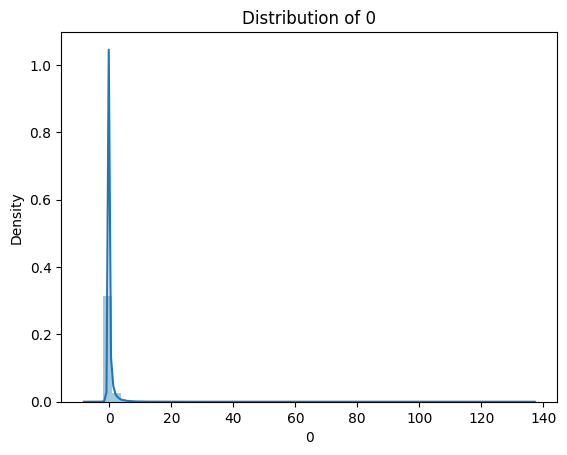

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


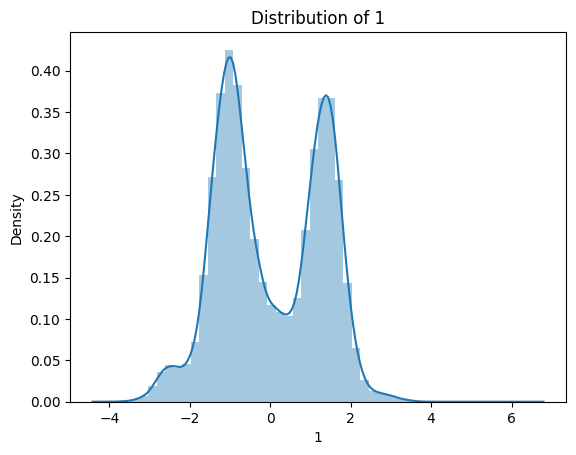

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


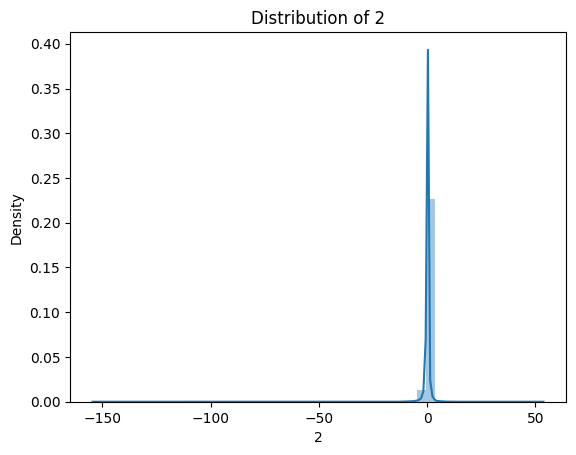

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


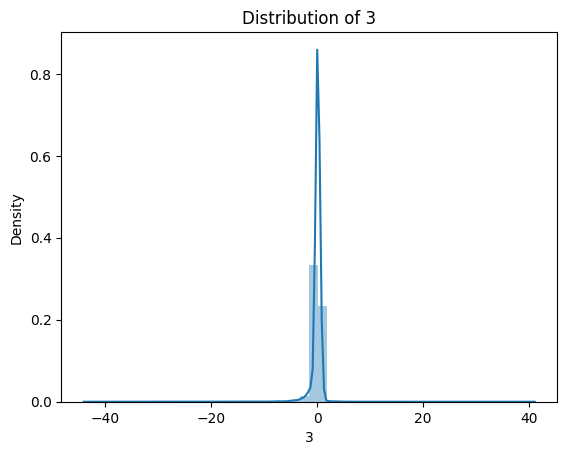

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


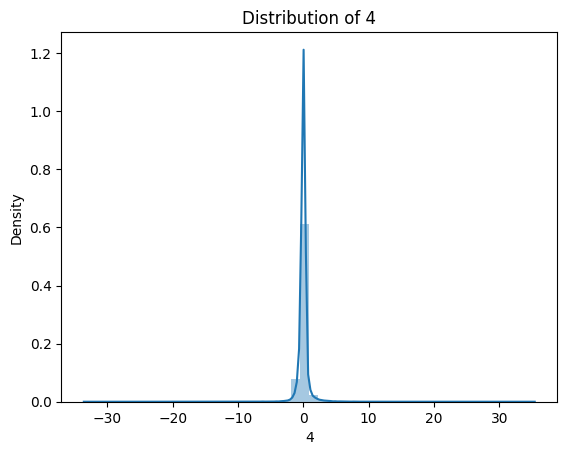

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


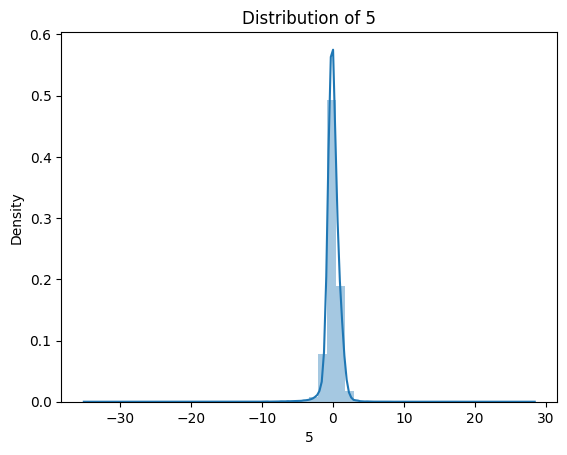

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


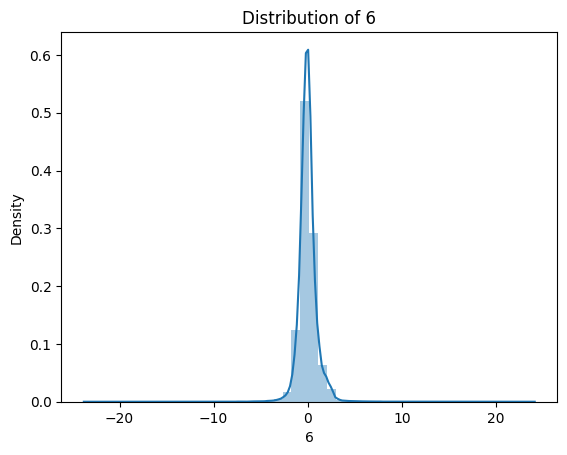

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


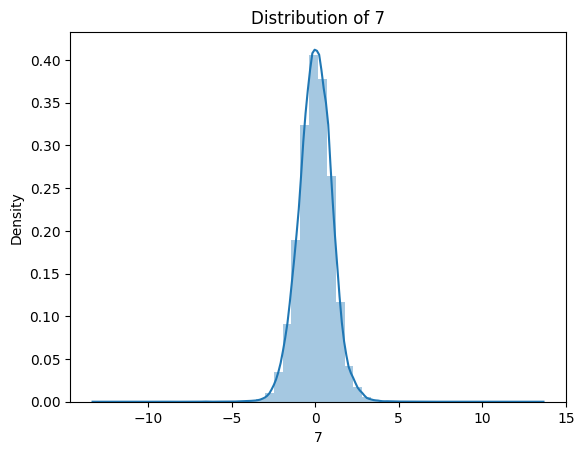

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


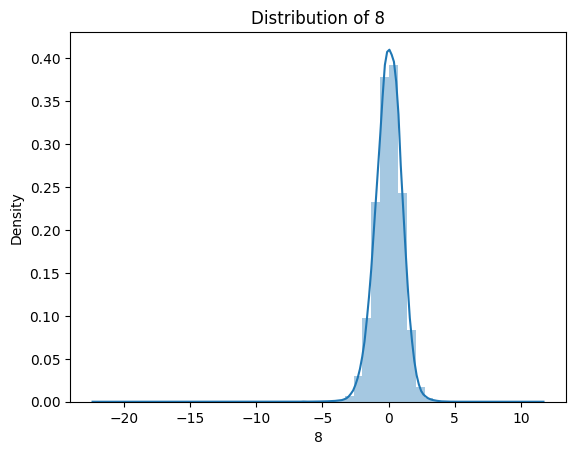

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


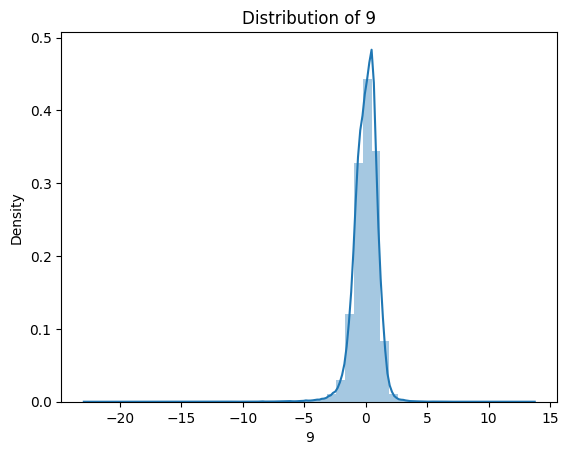

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


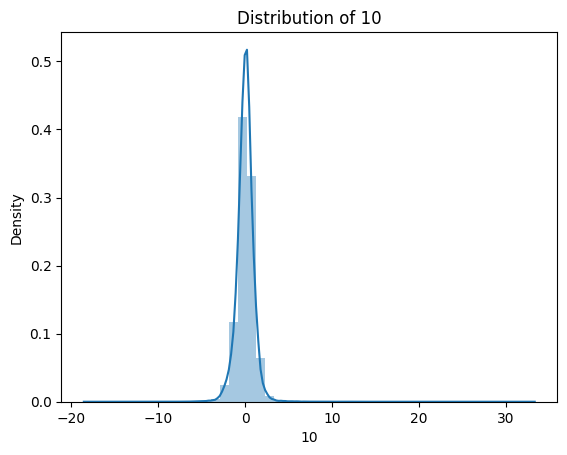

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


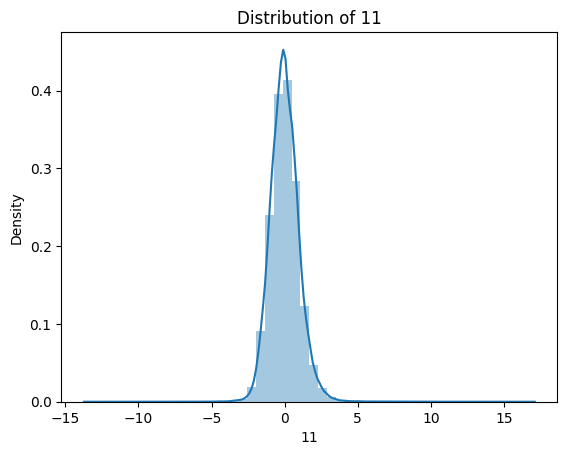

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


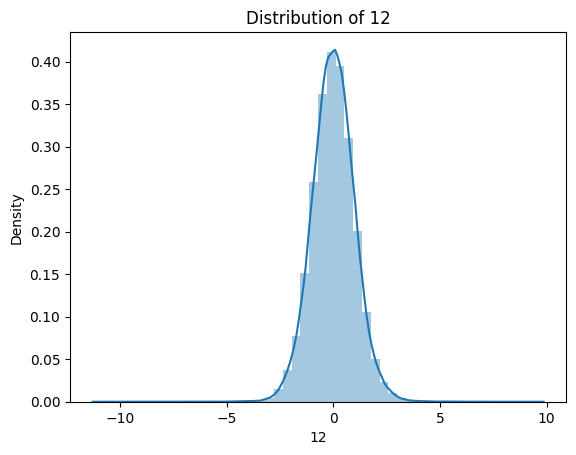

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


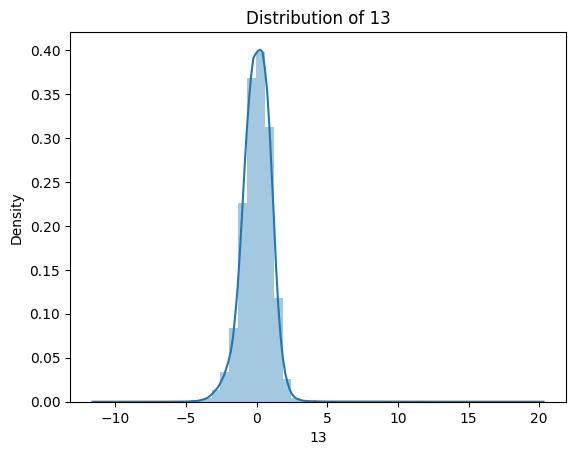

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


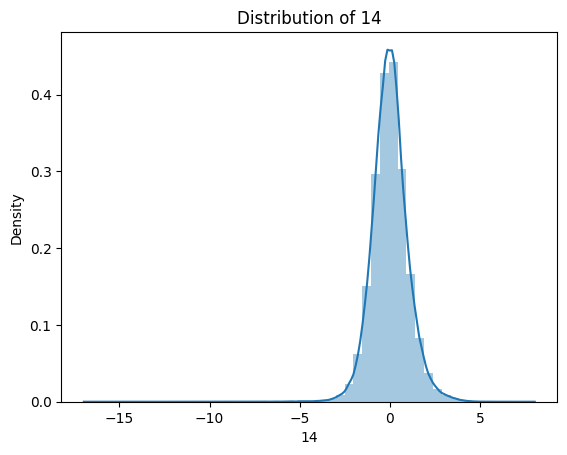

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


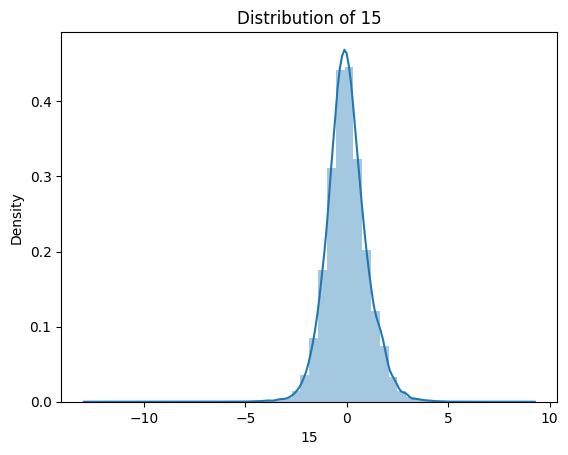

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


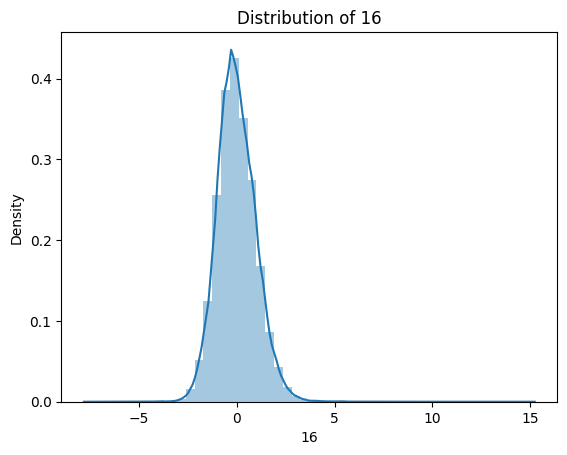

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


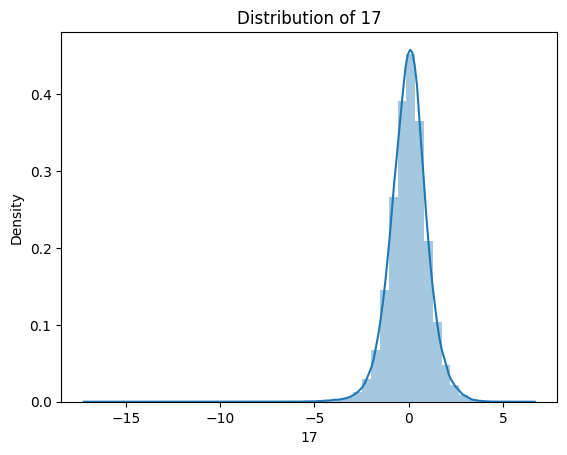

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


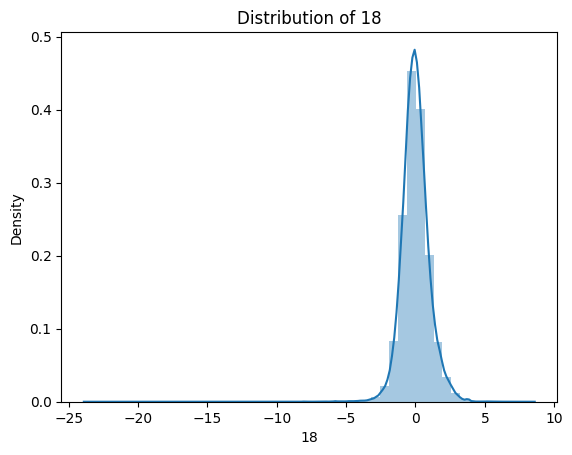

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


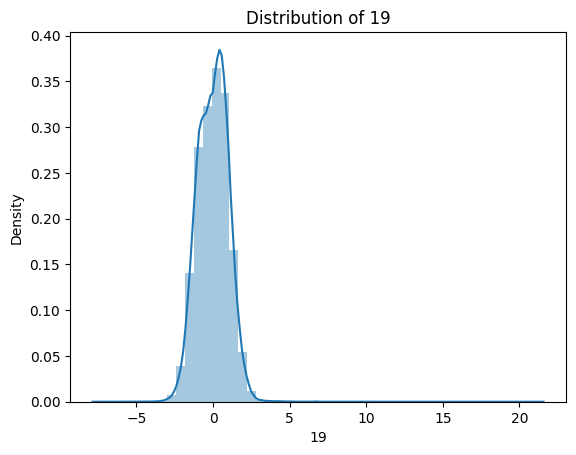

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


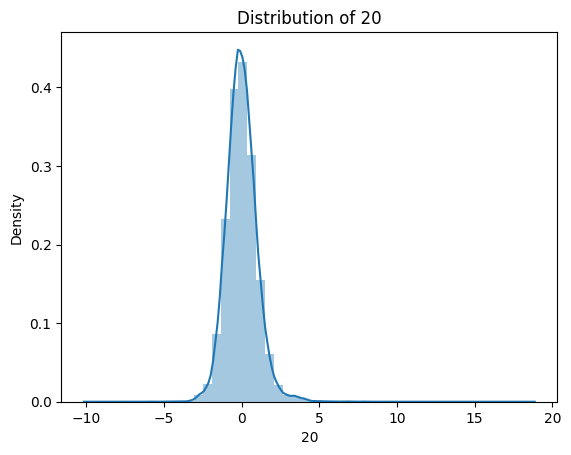

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


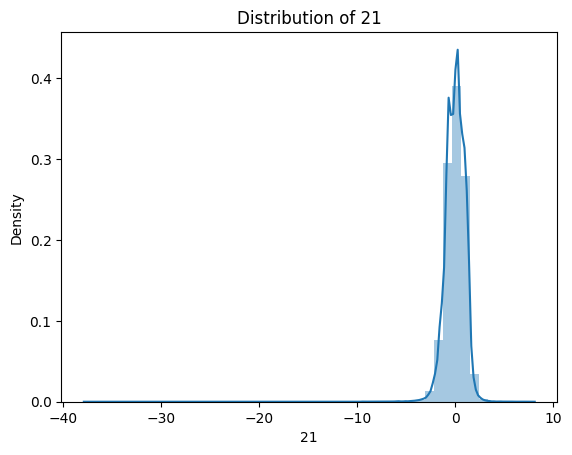

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


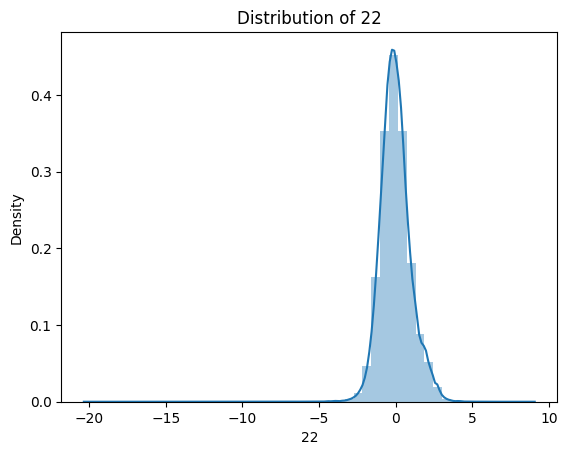

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


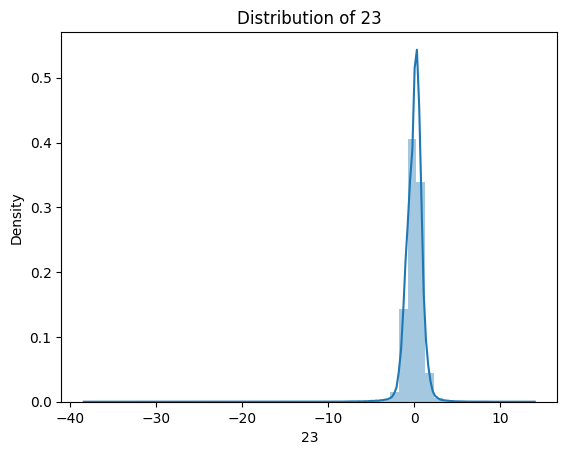

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


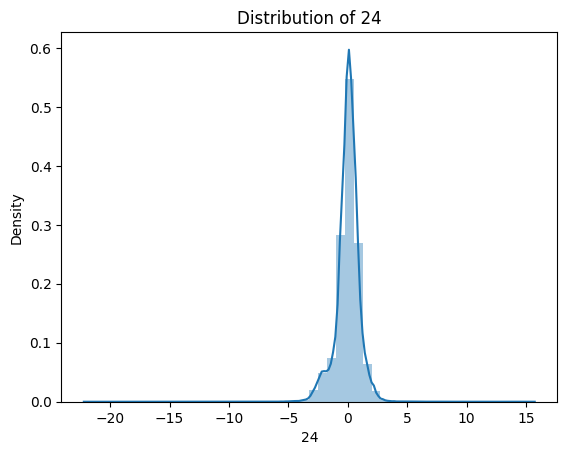

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


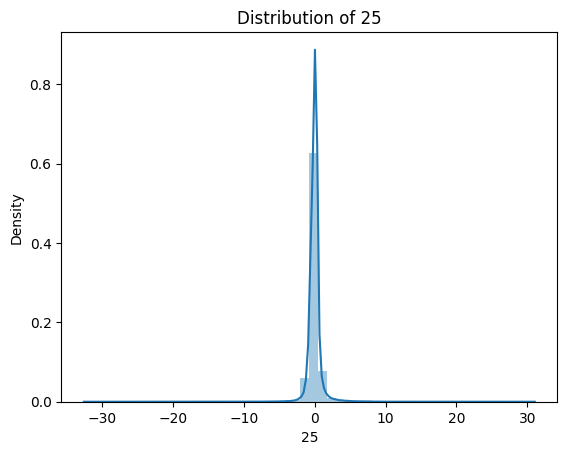

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


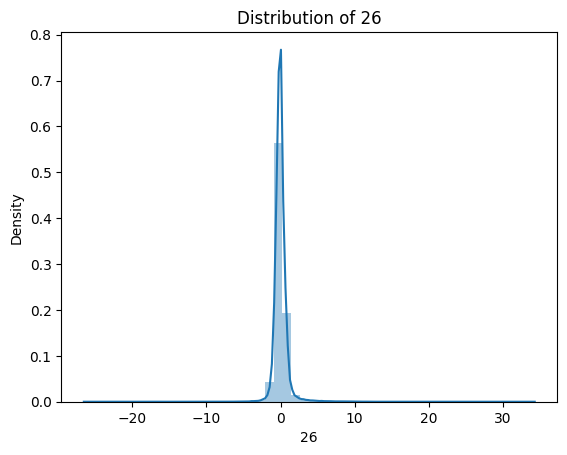

C:\Users\asus\AppData\Local\Temp\ipykernel_10328\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


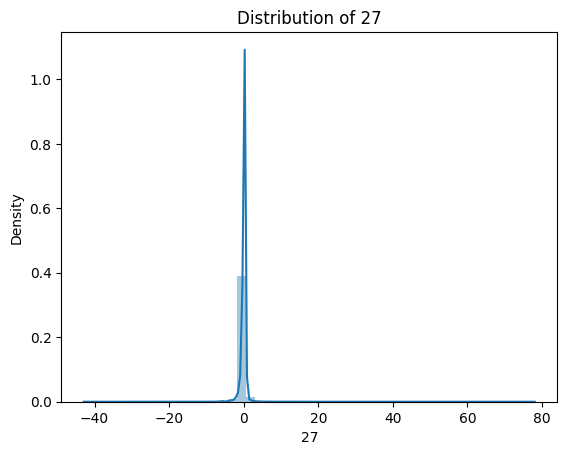

In [37]:
for i in final.columns[:28]:
    sns.distplot(final[i])  # kde=True adds the smooth curve
    plt.title(f'Distribution of {i}')
    plt.show()

Credit card fraud detection means finding unusual transactions.



Inertia(cost function) or distortion used to find best K not randomly which is called elbow method.

Inertia is the sum of squared euclidean distance from each point to centroid of cluster

Distortion is the distance from each point to centroid of cluster/ total number of points 

✅ Isolation Forest Workflow in Anomaly Detection

🔹 Training Phase (Unsupervised)

You feed the model only the features (Time, Amount, V1–V28).

No label (Class) is used.

The model learns by building random trees that try to isolate each point.

Points that are isolated very quickly (with fewer splits) are considered anomalies.

🔹 Scoring Phase

Every transaction gets an anomaly score.

You can set a threshold (e.g., anything above 0.7 is an anomaly).

🔹 Evaluation Phase (Now use labels)

You reveal the true labels (Class: 0 = normal, 1 = fraud).

You check:

Did the Isolation Forest flag the real frauds as anomalies?

You compute:

Precision: Of the transactions flagged as anomalies, how many were actually fraud?

Recall: Of all the actual fraud cases, how many did the model catch?

F1-score: Balance between precision and recall.

In [38]:
from sklearn.ensemble import IsolationForest


In [39]:
iso=IsolationForest(contamination=0.0017, random_state=42)
iso.fit(X_train)
pred=iso.predict(X_test)
#contamination=0.0017 tells the model to expect about 0.17% of the entire dataset are anomalies (outliers),

When you set contamination = 0.0017 (0.17%), the Isolation Forest:

Treats about 0.17% of your data points as the “most unusual” or “most isolated” (the anomalies).

It looks at all points, calculates how “different” each point is compared to the rest.

Then it flags the top 0.17% most different points as fraud (anomalies).

The remaining are considered normal (non-fraud).



In [40]:
pred

array([1, 1, 1, ..., 1, 1, 1])

An array of predictions, one for each data point (row) in final.

Each element is either:

1 — means the model thinks this point is normal (not an anomaly).

-1 — means the model flags this point as an anomaly (outlier).



In [42]:
num_anomalies = sum(x == -1 for x in pred)
print(num_anomalies)


158


In [43]:
num_frauds = (y_test == 1).sum()
print(num_frauds)


123


Isolation Forest predicted about 158 anomalies

The original ytest has 123 actual fraud cases

OnClass SVM

In [44]:
from sklearn.svm import OneClassSVM

# Initialize the model
ocsvm = OneClassSVM(kernel='rbf', nu=0.0017, gamma='scale') 

# Train on your scaled features (no labels)
ocsvm.fit(X_train)

# Predict anomalies
pred2 = ocsvm.predict(X_test)  # +1 = normal, -1 = anomaly

# Count anomalies
num_anomalies = (pred2 == -1).sum()
print("Anomalies detected:", num_anomalies)


Anomalies detected: 71201


Evaluation for isolated forest

In [45]:
from sklearn.metrics import classification_report,precision_score,recall_score,confusion_matrix,accuracy_score

In [46]:
# Convert -1 (anomaly) to 1 (fraud), and 1 (normal) to 0 before evaluation
pred_mapped = np.where(pred == -1, 1, 0)
pred_mapped


array([0, 0, 0, ..., 0, 0, 0])

In [47]:
print(confusion_matrix(y_test,pred_mapped))

[[70964   115]
 [   80    43]]


[[TN, FP],

 [FN, TP]]

TN (True Negative) = 70964 → Actual normal, predicted normal

FP (False Positive) = 115 → Actual normal, predicted fraud

FN (False Negative) = 80 → Actual fraud, predicted normal

TP (True Positive) = 43 → Actual fraud, predicted fraud

In [48]:
print(classification_report(y_test,pred_mapped))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.27      0.35      0.31       123

    accuracy                           1.00     71202
   macro avg       0.64      0.67      0.65     71202
weighted avg       1.00      1.00      1.00     71202



Although the Isolation Forest and opensvm detects roughly the same number of anomalies as the actual number of fraud cases (about 500), it doesn’t necessarily identify the correct fraudulent transactions. This is why the precision and recall for class 1 (fraud) are low

In [70]:
precision_score(ytest,pred_mapped)
#TP/TP+FP

0.25842696629213485

transaction predicted as unnormal,  25% are actually positive(unnormal)

In [71]:
recall_score(ytest,pred_mapped)
#TP/TP+FN

0.23469387755102042

transaction that are actually unnormal,  23% of them predicted as unnormal 

Evaluation for onclass svm

In [50]:
pred2_mapped = np.where(pred2 == -1, 1, 0)
pred2_mapped

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
print(classification_report(y_test,pred2_mapped))
recall_score(y_test,pred2_mapped)




              precision    recall  f1-score   support

           0       1.00      0.00      0.00     71079
           1       0.00      1.00      0.00       123

    accuracy                           0.00     71202
   macro avg       0.50      0.50      0.00     71202
weighted avg       1.00      0.00      0.00     71202



1.0

Improve performance by Tunning contamination in Isolation Forest (start with 0.005–0.02)

In [53]:
contamination_values = [0.001, 0.002, 0.005, 0.01, 0.02,0.03,0.1]
best_f1 = 0
best_cont = None

for cont in contamination_values:
    iso = IsolationForest(contamination=cont, random_state=42)
    iso.fit(X_train)
            
    pred3 = iso.predict(X_test)

    # Map predictions: -1 = anomaly → 1, 1 = normal → 0
    pred3_mapped = np.where(pred3 == -1, 1, 0)

    prec = precision_score(y_test, pred3_mapped)
    rec = recall_score(y_test, pred3_mapped)

    print(f"Contamination: {cont:.4f}, Precision: {prec:.2f}, Recall: {rec:.2f}")

   


Contamination: 0.0010, Precision: 0.35, Recall: 0.24
Contamination: 0.0020, Precision: 0.24, Recall: 0.37
Contamination: 0.0050, Precision: 0.13, Recall: 0.53
Contamination: 0.0100, Precision: 0.08, Recall: 0.66
Contamination: 0.0200, Precision: 0.04, Recall: 0.80
Contamination: 0.0300, Precision: 0.02, Recall: 0.84
Contamination: 0.1000, Precision: 0.00, Recall: 0.93


1. Try AutoEncoder to get get perfect result

2. Autoencoder: Unsupervised neural network that is used to detect outliers

3. Neural networks perform better with inputs between 0 and 1, especially when using activations like sigmoid, relu, or tanh.

✅  Neural network in general:

The input layer receives pixel values.

Early hidden layers detect simple features (edges, corners).

Deeper layers combine those into complex features (eyes, nose).

The output layer gives the class prediction (e.g., “dog”).

✅  Autoencoder:

Give the autoencoder your data — for example, a vector of 30 numbers (features).

Hidden layers learn features by compressing and decompressing the data.

The bottleneck is the compressed knowledge.

If input is normal, autoencoder reconstructs well.

If input is anomalous, reconstruction is poor → high error → anomaly detected.

✅ PCA needs standardized data to work well.

✅ Autoencoder needs normalized inputs (0 to 1) for stable training.

✅ Why No PCA Before Autoencoder?

-Autoencoders already perform dimensionality reduction:

The encoder part learns to compress the input into a lower-dimensional representation (latent space).

This is a learned, non-linear version of what PCA does (which is linear).

-PCA can remove useful features:

If you apply PCA before the Autoencoder, you risk losing important information about the data.

That makes it harder for the Autoencoder to learn useful patterns or detect anomalies.

-Autoencoders work best with full feature space:

Especially in high-dimensional anomaly detection like fraud, keeping all 30 features (V1–V28, Time, Amount) helps.





In [54]:
import tensorflow as tf
from tensorflow.keras import Model#keras python library to build neural network
from tensorflow.keras.layers import Input,Dense #Input is the shape on input data



In [55]:
df = pd.read_csv('creditcard.csv')  

X = df.drop(columns=['Class'])
y = df['Class']


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train = X_scaled[y == 0]

# Test on full dataset to detect outliers where its being trained only on normal ones
X_test = X_scaled
y_test = y.values


input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))

# Encoder
encoder = Dense(int(input_dim / 2), activation="relu")(input_layer)
encoder = Dense(int(input_dim / 4), activation="relu")(encoder)

# Decoder
decoder = Dense(int(input_dim / 2), activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')


history = autoencoder.fit(
    X_train, X_train,
    epochs=30,
    batch_size=256,
    validation_split=0.1,
    shuffle=True,
)

Epoch 1/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0181 - val_loss: 0.0016
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 8/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 9.7333e-04 - val_loss: 9.9664e-04
Epoch 9/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 9.5377e-04 - val_loss: 9.7276e-04
Epoch 10/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 9.4600e-04 - val_loss: 9.4518e-04
Epoch 11/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 9.3948e-04 - val_loss: 9.4399e-0

Train only on normal (Class=0) so the Autoencoder:

Learns only “normal patterns”

Struggles to reconstruct abnormal ones

Produces higher errors for fraud — letting us detect them.

Autoencoders learn to reconstruct what they’ve seen well — and perform poorly on unfamiliar or rare patterns, like fraud.

Both loss and val_loss decreased after ecah ephoc and were very close at each ephoc so  model is learning well and generalizing!

1. Input:  (e.g., 28 numbers)

2. Dense layer(s): 
   - Encoder: Compresses the input data into a smaller representation (latent space).

   - Decoder: Takes that compressed representation and tries to rebuild (reconstruct) the original input.

Model: Connects input → encoder layers → decoder layers → output

Keras: Provides the tools to create all of the above easily

🧠 Autoencoder: fails to reconstruct abnormal/fraudulent transactions → those have high reconstruction error.

🧠 Reconstruction error means difference ebtween input and reconstructed output

🧠 Think of it like:
“I’ve seen thousands of cats. I can draw cats perfectly now.
But this dog? I can’t draw it well — it’s too different.”



In general in supervised when training using.fit(x,y) we are feeding the model input data x, and the model tries to predict y. After prediction, the model compares its output to the true labels y using a loss function, which measures how far off the predictions are if we get loss and acc after ech ephoc during training if the loss decreases and acc increase after each ephoc then the model is training well otherwise (underfitting) feed the model with more data. 

Overfitting occurs when a model performs very well on the training data but poorly on unseen test data. You can detect it by comparing metrics: if training loss is low but test loss is high, or training accuracy is high but test accuracy is low, the model is likely overfitting.

In [56]:
"""
1. feed input data without the class column (just features).

2. The model returns the reconstructed version of that input — not labels.
"""
reconstructed=autoencoder.predict(X_test)
reconstructed

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step


array([[0.03411165, 0.94827837, 0.7670654 , ..., 0.41574872, 0.31298622,
        0.00340308],
       [0.03260557, 0.9480021 , 0.7672024 , ..., 0.41599676, 0.31312177,
        0.00300981],
       [0.02928472, 0.9473594 , 0.76714015, ..., 0.4160859 , 0.31306553,
        0.00293064],
       ...,
       [0.9325651 , 0.96513504, 0.7663014 , ..., 0.41601026, 0.31303075,
        0.00408169],
       [0.9435946 , 0.96195835, 0.762904  , ..., 0.41650242, 0.3134037 ,
        0.00333957],
       [0.9440012 , 0.964984  , 0.76553684, ..., 0.41653082, 0.3124091 ,
        0.00418192]], dtype=float32)

In [57]:
# MSE: difference between reconstructed and original one
mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)

In [58]:
mse

array([0.00061556, 0.00032385, 0.00189571, ..., 0.00111242, 0.0035621 ,
       0.00031785])

Low MSE: The autoencoder reconstructed the sample well → likely normal data.

High MSE: The autoencoder struggled to reconstruct the sample → possibly anomalous or fraudulent.

In [59]:
threshold = np.percentile(mse, 99)#gives you the MSE value which is bigger than 99% of these values
anomalies = mse > threshold
anomalies

array([False, False, False, ..., False, False, False])

In [60]:
count=(anomalies==True).sum()
count

np.int64(2849)

In [61]:
count2=(y_test==1).sum()
count2

np.int64(492)

In [62]:
predicted_labels = anomalies.astype(int)
print(classification_report(y_test, predicted_labels))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.14      0.82      0.24       492

    accuracy                           0.99    284807
   macro avg       0.57      0.91      0.62    284807
weighted avg       1.00      0.99      0.99    284807



✅ Recall = 0.78
"Of all actual fraud cases, 78% were correctly predicted as fraud."

⚠️ Precision = 0.14
"Of all the transactions predicted as fraud, only 14% were actually fraud."

In [63]:
precision_score(y_test,anomalies)

0.1418041418041418

In [64]:
recall_score(y_test,anomalies)

0.8211382113821138

Conclusion and Insights:

The models demonstrate strong performance in identifying normal transactions but face significant challenges detecting rare fraud cases due to the extreme class imbalance. 

It’s normal that precision is low in unsupervised fraud detection.

You're trying to find tiny needles in a massive haystack without knowing what the needle looks like.

But detecting 70–80% of frauds still adds value — especially if you send those cases for human review.

